# Bears For Birds Biodiversity Data Analysis

In [1]:
# Import packages
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import scipy
import sklearn
import pandas as pd

## Transect Survey Species Data

In [57]:
#Data Import and cleanup for transect species
bfb_ts_data = pd.read_csv("BFB_SP23_TS.csv")
bfb_ts_data = bfb_ts_data.drop("Notes",axis=1)
bfb_ts_data['Date'] = pd.to_datetime(bfb_ts_data['Date'])
bfb_ts_data = bfb_ts_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
bfb_ts_data = bfb_ts_data.replace({"Nuttal's Woodpecker":"Nuttall's Woodpecker"})
bfb_ts_data

,Transect #,Date,Route,Time Bin,Species,# Individuals
0,1,2023-02-21,C,Evening (3-5pm),Anna's Hummingbird,2
1,1,2023-02-21,C,Evening (3-5pm),Turkey Vulture,1
2,1,2023-02-21,C,Evening (3-5pm),Black Phoebe,1
3,1,2023-02-21,C,Evening (3-5pm),American Crow,4
4,1,2023-02-21,C,Evening (3-5pm),Oak Titmouse,1
...,...,...,...,...,...,...
247,24,2023-04-26,A,Evening (3-5pm),Red-Shouldered Hawk,1
248,24,2023-04-26,A,Evening (3-5pm),American Crow,5
249,24,2023-04-26,A,Evening (3-5pm),Bushtit,3
250,24,2023-04-26,A,Evening (3-5pm),Lesser Goldfinch,5


In [58]:
#Data import for Transect Periods
bfb_tp_data = pd.read_csv("BFB_SP23_TP.csv")
bfb_tp_data = bfb_tp_data.drop("Notes",axis=1)
bfb_tp_data = bfb_tp_data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
bfb_tp_data

,Transect #,Date,Route,Time Bin,Observer(s),Start Time,End Time,Weather,Precipitation,Wind,Temperature,eBird Link
0,1,02/21/2023,C,Evening (3-5pm),"Allison Olvera, Zebedee Cataag, Richard Hasega...",15:19,15:37,Sunny,Dry,Windy,52,https://ebird.org/checklist/S129322949
1,2,02/21/2023,B,Evening (3-5pm),"Allison Olvera, Zebedee Cataag, Richard Hasega...",15:37,16:07,Sunny,Dry,Windy,52,https://ebird.org/checklist/S129326008
2,5,03/01/2023,C,Evening (3-5pm),"Allison Olvera, Diego Montesinos, Miguel Gomez...",15:31,15:58,Sunny,Dry,Slight Wind,52,https://ebird.org/checklist/S129954473
3,6,03/05/2023,A,Evening (3-5pm),"Isha Murali, Carter (Dog), Sierra Glassman, Pe...",15:18,15:59,Partial Cloudy,Dry,Slight Wind,50,https://ebird.org/checklist/S130286897
4,7,03/08/2023,B,Mid-day (11am-1pm),"Pearl Lee, Allison Olvera",12:07,12:53,Sunny,Dry,Calm,45,https://ebird.org/checklist/S130471678
5,8,03/09/2023,C,Mid-day (11am-1pm),Pearl Lee,11:04,11:27,Cloudy,Dry,Slight Wind,43,https://ebird.org/checklist/S130532762
6,9,03/10/2023,B,Mid-day (11am-1pm),"Cecilia Mendoza, Sierra Glassman",11:10,11:25,Cloudy,Dry,Calm,51,https://ebird.org/checklist/S130600681
7,10,03/11/2023,C,Morning (7-9am),Sierra Glassman,8:51,9:00,Cloudy,Dry,Calm,51,https://ebird.org/checklist/S130664727
8,11,03/15/2023,B,Mid-day (11am-1pm),"Aaron Guo, Jonathan Lee, Sierra Glassman, Pear...",12:39,13:00,Sunny,Dry,Slight Wind,54,https://ebird.org/checklist/S130986004
9,12,03/21/2023,B,Mid-day (11am-1pm),Pearl Lee,11:09,11:25,Cloudy,Rain,Windy,51,https://ebird.org/checklist/S131466521


In [59]:
#Creation of new dataframe with transect start and end times (for joining)

bfb_tp_times = bfb_tp_data[["Transect #","Date","Start Time","End Time"]]
bfb_tp_times["Date_Start"] = bfb_tp_times["Date"] +" "+ bfb_tp_times["Start Time"]
bfb_tp_times["Date_End"] = bfb_tp_times["Date"] +" "+ bfb_tp_times["End Time"]
bfb_tp_times = bfb_tp_times[["Transect #","Date","Date_Start","Date_End"]]

/var/folders/02/0y19g5t15bn_c1c82kr48pgc0000gn/T/ipykernel_92920/3995235782.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bfb_tp_times["Date_Start"] = bfb_tp_times["Date"] +" "+ bfb_tp_times["Start Time"]
/var/folders/02/0y19g5t15bn_c1c82kr48pgc0000gn/T/ipykernel_92920/3995235782.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bfb_tp_times["Date_End"] = bfb_tp_times["Date"] +" "+ bfb_tp_times["End Time"]


In [60]:
bfb_tp_times

,Transect #,Date,Date_Start,Date_End
0,1,02/21/2023,02/21/2023 15:19,02/21/2023 15:37
1,2,02/21/2023,02/21/2023 15:37,02/21/2023 16:07
2,5,03/01/2023,03/01/2023 15:31,03/01/2023 15:58
3,6,03/05/2023,03/05/2023 15:18,03/05/2023 15:59
4,7,03/08/2023,03/08/2023 12:07,03/08/2023 12:53
5,8,03/09/2023,03/09/2023 11:04,03/09/2023 11:27
6,9,03/10/2023,03/10/2023 11:10,03/10/2023 11:25
7,10,03/11/2023,03/11/2023 8:51,03/11/2023 9:00
8,11,03/15/2023,03/15/2023 12:39,03/15/2023 13:00
9,12,03/21/2023,03/21/2023 11:09,03/21/2023 11:25


In [61]:
#Creation of new dataset with transect species and transect start/end times

bfb_ts_data = bfb_ts_data.merge(bfb_tp_times,on="Transect #").drop("Date_y",axis=1)
bfb_ts_data = bfb_ts_data.rename(columns={"Date_x":"Date"})
bfb_ts_data

,Transect #,Date,Route,Time Bin,Species,# Individuals,Date_Start,Date_End
0,1,2023-02-21,C,Evening (3-5pm),Anna's Hummingbird,2,02/21/2023 15:19,02/21/2023 15:37
1,1,2023-02-21,C,Evening (3-5pm),Turkey Vulture,1,02/21/2023 15:19,02/21/2023 15:37
2,1,2023-02-21,C,Evening (3-5pm),Black Phoebe,1,02/21/2023 15:19,02/21/2023 15:37
3,1,2023-02-21,C,Evening (3-5pm),American Crow,4,02/21/2023 15:19,02/21/2023 15:37
4,1,2023-02-21,C,Evening (3-5pm),Oak Titmouse,1,02/21/2023 15:19,02/21/2023 15:37
...,...,...,...,...,...,...,...,...
247,24,2023-04-26,A,Evening (3-5pm),Red-Shouldered Hawk,1,04/26/2023 15:33,04/26/2023 15:48
248,24,2023-04-26,A,Evening (3-5pm),American Crow,5,04/26/2023 15:33,04/26/2023 15:48
249,24,2023-04-26,A,Evening (3-5pm),Bushtit,3,04/26/2023 15:33,04/26/2023 15:48
250,24,2023-04-26,A,Evening (3-5pm),Lesser Goldfinch,5,04/26/2023 15:33,04/26/2023 15:48


### Abundance

The original study used the number of survey days a particular species was encountered as an index of abundance, so I calculated that for all of the species seen across the survey period. I ignored time of day in the below analysis.

In [62]:
#Version of transect species data with no time bins
bfb_no_timebins = bfb_ts_data.drop("Time Bin",axis=1)
temp2 = bfb_no_timebins[['Date','Species']].value_counts().reset_index(name='count')
temp2 = temp2.sort_values(by=['Date'],ascending=True).drop("count",axis=1)
temp2

,Date,Species
134,2023-02-21,Black Phoebe
132,2023-02-21,American Robin
135,2023-02-21,California Gull
136,2023-02-21,Cedar Waxwing
137,2023-02-21,Chestnut-backed Chickadee
...,...,...
80,2023-04-26,Bushtit
81,2023-04-26,Dark-eyed Junco
82,2023-04-26,Lesser Goldfinch
83,2023-04-26,Red-Shouldered Hawk


In [63]:
#More data cleaning
temp2 = temp2.applymap(lambda x: x.strip() if isinstance(x, str) else x)

#Print all unique species
np.unique(temp2["Species"])

array(['American Crow', 'American Robin', "Anna's Hummingbird",
       "Bewick's Wren", 'Black Phoebe', 'Brown Creeper', 'Bushtit',
       'California Gull', 'California Towhee', 'Cedar Waxwing',
       'Chestnut-backed Chickadee', 'Common Raven', 'Dark-eyed Junco',
       'Downy Woodpecker', 'Golden-crowned Kinglet',
       'Golden-crowned Sparrow', 'Hermit Thrush', 'House Finch',
       'Lesser Goldfinch', "Nuttall's Woodpecker", 'Oak Titmouse',
       'Pacific-slope Flycatcher', 'Peregrine Falcon',
       'Red-Shouldered Hawk', 'Red-breasted Nuthatch',
       'Red-crowned Kinglet', 'Red-shouldered Hawk', 'Ring-billed Gull',
       'Rock Pigeon', 'Ruby-crowned Kinglet', 'Song Sparrow',
       'Spotted Towhee', "Townsend's Warbler", 'Turkey Vulture',
       'Western Bluebird', 'Western Gull', 'White-Crowned Sparrow',
       'White-crowned Sparrow', 'White-throated Sparrow',
       'Yellow-rumped Warbler'], dtype=object)

Above are all of the unique species seen across the survey period.

In [64]:
#Calculate abundance as number of days seen
abundance_metrics = temp2.groupby("Species")['Date'].nunique()

abundance_metrics = abundance_metrics.to_frame()
abundance_metrics.reset_index(inplace=True)
abundance_metrics = abundance_metrics.rename(columns={"Date":"# Days Seen"})
abundance_metrics

,Species,# Days Seen
0,American Crow,17
1,American Robin,15
2,Anna's Hummingbird,16
3,Bewick's Wren,1
4,Black Phoebe,2
5,Brown Creeper,1
6,Bushtit,10
7,California Gull,2
8,California Towhee,10
9,Cedar Waxwing,5


The authors of the article also calculated frequency for the birds they saw:

$$\text{frequency} = \frac{\text{# of surveys in which a bird was seen}}{\text{total number of surveys}}$$

In order to keep my data analysis consistent, I am consolidating all surveys that were done on the same day, and am looking at the frequency of the birds per day.

In [65]:
#Calculate frequency per day by dividing # of days seen by total # of days
total_days = len(temp2["Date"].unique())
abundance_metrics["Frequency"] = abundance_metrics["# Days Seen"]/total_days
abundance_metrics

,Species,# Days Seen,Frequency
0,American Crow,17,1.000000
1,American Robin,15,0.882353
2,Anna's Hummingbird,16,0.941176
3,Bewick's Wren,1,0.058824
4,Black Phoebe,2,0.117647
5,Brown Creeper,1,0.058824
6,Bushtit,10,0.588235
7,California Gull,2,0.117647
8,California Towhee,10,0.588235
9,Cedar Waxwing,5,0.294118


The abundance metric data per day can be viewed in ths abundance_metrics_day CSV.

In [66]:
#Save as CSV
abundance_metrics.to_csv('abundance_metrics_day.csv',index_label='Id')

In [67]:
#Calculate mean frequencies for days
frequency_mean_d = np.mean(abundance_metrics["Frequency"])
frequency_variance_d = np.var(abundance_metrics["Frequency"])

frequency_mean_d, frequency_variance_d

(0.30588235294117627, 0.09259515570934253)

The observed mean frequency across days was 0.306, and the observed variance across days was 0.0926.

Across all the transects, only two species had a frequency of 1 (meaning they were seen in every survey): the American Crow and the Dark-Eyed Junco. In the original *Condor* study, 10 species had a frequency of 1 in the most recent survey period of 2006-07. Both of the species that had a frequency of 1 in our day data were included in these 10 species.

The rest of the diversity metrics are calculated per transect, so I calculated abundance per transect as well.

In [68]:
#Repeat the process above per transect; datacleaning
temp3 = bfb_ts_data[["Transect #","Species"]]
temp3 = temp3.sort_values(by=["Transect #"],ascending=True)
temp3 = temp3.applymap(lambda x: x.strip() if isinstance(x, str) else x)
temp3

,Transect #,Species
0,1,Anna's Hummingbird
1,1,Turkey Vulture
2,1,Black Phoebe
3,1,American Crow
4,1,Oak Titmouse
...,...,...
246,24,Anna's Hummingbird
247,24,Red-Shouldered Hawk
248,24,American Crow
249,24,Bushtit


In [69]:
#Calculate number of transects seen and frequencies per species
transect_abundance_metrics = temp3.groupby("Species")['Transect #'].nunique()

transect_abundance_metrics = transect_abundance_metrics.to_frame()
transect_abundance_metrics.reset_index(inplace=True)
transect_abundance_metrics = transect_abundance_metrics.rename(columns={"Transect #":"# Transects Seen"})

total_transects = len(temp3["Transect #"].unique())
transect_abundance_metrics["Transect Frequency"] = transect_abundance_metrics["# Transects Seen"]/total_transects
transect_abundance_metrics

,Species,# Transects Seen,Transect Frequency
0,American Crow,22,1.000000
1,American Robin,17,0.772727
2,Anna's Hummingbird,20,0.909091
3,Bewick's Wren,1,0.045455
4,Black Phoebe,2,0.090909
5,Brown Creeper,1,0.045455
6,Bushtit,11,0.500000
7,California Gull,2,0.090909
8,California Towhee,12,0.545455
9,Cedar Waxwing,5,0.227273


Across all the transects, only two species had a frequency of 1 (meaning they were seen in every survey): the American Crow and the Dark-Eyed Junco.

In the original *Condor* study, 10 species had a frequency of 1 in the most recent survey period of 2006-07. Both of the species that had a frequency of 1 in our transect data were included in these 10 species.

In [70]:
#Calculate mean frequencies for transects
frequency_mean_t = np.mean(transect_abundance_metrics["Transect Frequency"])
frequency_variance_t = np.var(transect_abundance_metrics["Transect Frequency"])

frequency_mean_t, frequency_variance_t

(0.278409090909091, 0.08813920454545453)

The observed mean frequency across transects was 0.278, and the observed variance was 0.088. Both the observed mean and variance across transects were a little less than the observed mean and variance across days. Notably, the American Crow and Dark-eyed Junco were also seen across every transect.

In [71]:
#Save as CSV
transect_abundance_metrics.to_csv('abundance_metrics_transect.csv',index_label='Id')

The abundance metric data per transect can be viewed in ths abundance_metrics_transect CSV.

### Alpha Diversity

According to Wikipedia, Alpha diversity is defined as the mean species diversity in a site at a local scale. It can be calculated in many different ways.

For each survey day's transect, I calculated Simpson's Diversity (adjusted for finite sample size), which is equal to:

$$1 - (\sum \frac{{n}({n}-1)}{{N}({N}-1)})$$

where ${n}$ is the number of individuals of one species and ${N}$ is the total number of individuals seen that day.

In [72]:
#Simpson's Diversity over time- calculate per day or per transect
#transect parameter determines how the data is partitioned
#If transect = False, partition by day. If transect = True, partition by transect
#d is some dataframe to pass in

def simpson_diversity(d,transect=False):
    if transect:
        d_temp = d[["Transect #","Species","# Individuals"]]
    else:
        d_temp = d[["Date","Species","# Individuals"]]
    d_tg = d_temp.groupby("Species").agg(sum)
    
    N = np.sum(d_tg["# Individuals"]) #sum total number of individuals
    def summation_term(n):
        return (n*(n-1))/(N*(N-1))
    d_tg["temp_col"] = d_tg[["# Individuals"]].apply(summation_term)
    #The right term in the below expression is known as Simpson's D and is used later
    return 1 - np.sum(d_tg["temp_col"])

In [73]:
#Calculate Simpson's diversity for each transect
sd_per_transect = []

for t in bfb_ts_data["Transect #"].unique():
    one_transect = bfb_ts_data[bfb_ts_data["Transect #"] == t]
    sd_per_transect.append(simpson_diversity(one_transect,transect=True))

In [74]:
#Make sure all transects are accounted for
len(bfb_ts_data["Transect #"].unique()) == len(sd_per_transect)

True

In [75]:
#Print all of the Simpson Diversity indices per transect
unique_transects = bfb_ts_data["Transect #"].unique()

for b in range(len(bfb_ts_data["Transect #"].unique())):
    print(unique_transects[b],sd_per_transect[b])

1 0.8791208791208791
2 0.8048780487804879
5 0.8991674375578168
6 0.8634343434343434
7 0.9009009009009009
8 0.8583333333333334
9 0.922077922077922
10 0.9093432007400555
11 0.907563025210084
12 0.8888888888888888
13 0.861904761904762
14 0.8477891156462585
15 0.8439359267734554
16 0.8511796733212341
17 0.9233870967741935
18 0.8974358974358975
19 0.7909343200740055
20 0.7866666666666666
21 0.9225806451612903
22 0.9037927844588344
23 0.9334677419354839
24 0.8658008658008658


I plotted Simpson Diversity across all of the different transects. I set the axes to 0 and 1, as the Simpson Diversity is bounded by those 2 values. The Simpson Divesrity doesn't show a net upward or downward trend, but I noticed a decrease from Transect 12 to Transect 16 and a dip from Transects 18 to 21. Across all the Transects, the calculated Simpson Diversity was between 0.75 to 0.95.

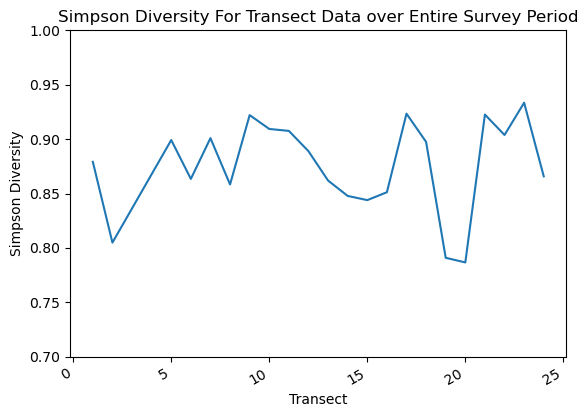

In [76]:
#Plot Simpson Diversity per transect across all transects
simpson_fig, simpson_ax = plt.subplots()
simpson_ax.plot(unique_transects,sd_per_transect)
simpson_fig.autofmt_xdate()
plt.title("Simpson Diversity For Transect Data over Entire Survey Period")
plt.xlabel("Transect")
plt.ylabel("Simpson Diversity")
simpson_ax.set_ylim(0.70,1)
plt.savefig("SD_Transect.png")

The study used the inverse of Simpson's D (the right term in the summation) as an estimate of alpha diversity.

In [77]:
#Calculate D per day or per transect
#transect parameter determines how the data is partitioned
#If transect = False, partition by day. If transect = True, partition by transect
#d is some dataframe to pass in
def simpson_d(d,transect=False):
    if transect:
        d_temp = d[["Transect #","Species","# Individuals"]]
    else:
        d_temp = d[["Date","Species","# Individuals"]]
    d_tg = d_temp.groupby("Species").agg(sum)
    
    N = np.sum(d_tg["# Individuals"])
    def summation_term(n):
        return (n*(n-1))/(N*(N-1))
    d_tg["temp_col"] = d_tg[["# Individuals"]].apply(summation_term)
    return np.sum(d_tg["temp_col"])

In [78]:
#Calculate Estimated Alpha Diversity per transect as stated above
ead_per_transect = []

for t in bfb_ts_data["Transect #"].unique():
    one_transect = bfb_ts_data[bfb_ts_data["Transect #"] == t]
    ead_per_transect.append(simpson_d(one_transect,transect=True))

ead_per_transect = np.reciprocal(ead_per_transect)

In [79]:
#Print all of the EADs per transect
for b in range(len(bfb_ts_data["Transect #"].unique())):
    print(unique_transects[b],ead_per_transect[b])

1 8.272727272727272
2 5.125
5 9.91743119266055
6 7.32248520710059
7 10.09090909090909
8 7.0588235294117645
9 12.833333333333334
10 11.030612244897958
11 10.818181818181818
12 9.0
13 7.241379310344827
14 6.569832402234636
15 6.407624633431086
16 6.719512195121951
17 13.052631578947368
18 9.75
19 4.783185840707964
20 4.6875
21 12.916666666666666
22 10.394230769230768
23 15.030303030303031
24 7.451612903225806


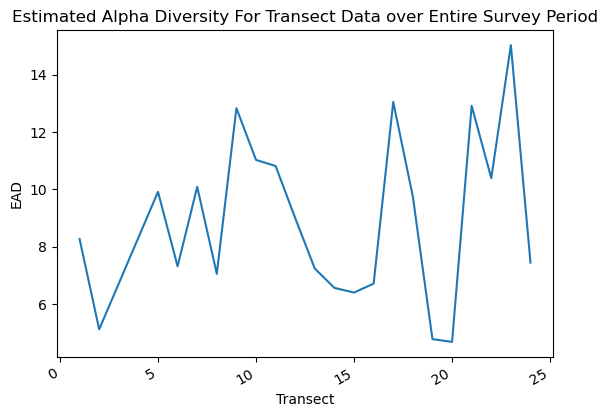

In [80]:
#Plot EAD per transect across all transects
simpson_ead_fig, simpson_ead_ax = plt.subplots()
simpson_ead_ax.plot(unique_transects,ead_per_transect)
simpson_ead_fig.autofmt_xdate()
plt.title("Estimated Alpha Diversity For Transect Data over Entire Survey Period")
plt.xlabel("Transect")
plt.ylabel("EAD")
plt.savefig("EAD_Transect.png")

I plotted the Estimated Alpha Diversity across all the Transect periods. The EAD had a lot higher variance compared to the Simpson's Diversity. I noticed that it showed similar dips compared to the Simpson's Diversity graph, although the valleys are a lot more steep. Across all the transects, the EAD was less the temporal estimates provided in the original 2012 study. This difference did not necessarily occur because of any significant drops in avian biodiversity; it could arise because of the use of a (likely) smaller dataset compared to the one used in the original study.

Shannon Diversity is a different metric to measure alpha diversity. It is defined as:

$$-\sum\limits_{i=1}^{S} {p_i}\log_2 {p_i}$$

where $S$ is the total number of different species and $p_i$ is the proportion of individuals belonging to the $i$th species. It is mathematically equivalent to entropy.

In [81]:
#Calculate Shannon Diversity per day or per transect
#transect parameter determines how the data is partitioned
#If transect = False, partition by day. If transect = True, partition by transect
#d is some dataframe to pass in

def shannon_diversity(d,transect=False):
    if transect:
        d_temp = d[["Transect #","Species","# Individuals"]]
    else:
        d_temp = d[["Date","Species","# Individuals"]]
    d_tg = d_temp.groupby("Species").agg(sum)
    
    N = np.sum(d_tg["# Individuals"])
    d_tg["props"] = d_tg[["# Individuals"]]/N
    shannon_div = scipy.stats.entropy(pk = d_tg["props"])
    return shannon_div

In [82]:
#Calculate Shannon Diversity Index/Entropy per transect

entropy_per_transect = []

for t in bfb_ts_data["Transect #"].unique():
    one_transect = bfb_ts_data[bfb_ts_data["Transect #"] == t]
    entropy_per_transect.append(shannon_diversity(one_transect,transect=True))

In [52]:
#Print all of the Shannon Diversity Indices/Entropies per transect
for b in range(len(bfb_ts_data["Transect #"].unique())):
    print(unique_transects[b],entropy_per_transect[b])

1 1.8095142558492823
2 1.7588478388548352
5 2.367940939348167
6 2.248476886743397
7 2.264445737889063
8 1.7710163687835907
9 2.2480845061618107
10 2.4050068016899413
11 2.3659499517254754
12 1.6769877743224173
13 1.9264330279775634
14 2.1119729081871683
15 2.13743123365829
16 1.9659647655111487
17 2.3933121229745242
18 2.3199412851404078
19 1.9283179233836258
20 1.7337796322221846
21 2.2991289086218623
22 2.301719943692197
23 2.4366338217595205
24 1.8315887189462852


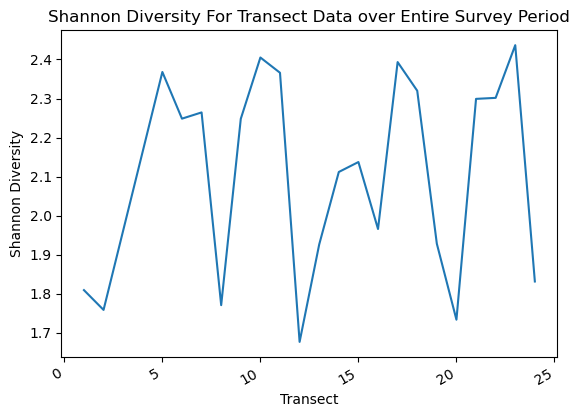

In [83]:
#Plot Shannon Diversity/Entropy per transect across all transects
entropy_fig, entropy_ax = plt.subplots()
entropy_ax.plot(bfb_ts_data["Transect #"].unique(),entropy_per_transect)
entropy_fig.autofmt_xdate()
plt.title("Shannon Diversity For Transect Data over Entire Survey Period")
plt.xlabel("Transect")
plt.ylabel("Shannon Diversity")
plt.savefig("ShD_Entropy_Transect.png")

I have attached a plot of the Shannon Diversity/Entropy over the entire survey period. The Shannon Diversity fluctuates more than the Simpson's Diversity. Unlike Simpson's Diversity and EAD, the Shannon Diversity also has multiple peaks, although the variance is not as high as the EAD.

In [84]:
#Save all the calculated Alpha Diversity metrics into one CSV
alpha_csv_dict = {}
alpha_csv_dict["Transect #"] = bfb_ts_data["Transect #"].unique()
alpha_csv_dict["Simpson Diversity"] = sd_per_transect
alpha_csv_dict["Estimated Alpha Diversity"] = ead_per_transect
alpha_csv_dict["Shannon Diversity"] = entropy_per_transect

alpha_all = pd.DataFrame(alpha_csv_dict)
alpha_all.to_csv('alpha_diversity.csv',index_label='Id')

The alpha diversity data can be found in the alpha_diversity CSV file, which includes Simpson Diversity, the Estimated Alpha Diversity (as calculated in the original paper), and the Shannon Diversity per transect.

## Limitations

After talking with Sierra, I decided not to include Beta Diversity because the transects are of variable length, are not straight lines, and are close to each other. I also could not find anything on proportional similarity in Pielou's *Mathematical Ecology*, so I couldn't calculate beta diversity with the same metrics that the study's original authors used.

I could not get the X-Axis of the plots to accurately reflect the time between transects. Two transects were also removed, and no surveys were done during spring break (03/26/23 to 04/02/2023). The dataset is also probably smaller than that used in the original study (I do not know how many surveys were done in the three time periods, so I don't think I can know for sure).

As I mentioned briefly earlier, some of the trends that appeared in the analysis above might have appeared because we might have less data than the authors of the study did. They also could have appeared due to random chance, so I don't think I can draw any conclusions about how diversity changes across time just yet.

## Next Steps

In the future, I would recommend doing more surveying at a constant rate (e.g. once a week) in order to build up our dataset, as I feel like the biggest limit right now is the size of the dataset.

## Acknowledgements

Thank you to Dr. Shultz, Dr. Tingley, and Dr. Bowie for publishing the article that I based my methods off of.

And thank you to Sierra, my teammate Zebedee, and everyone else in Bears for Birds for surveying this semester. Happy birding!